In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 9)

In [ ]:
def random_neural_network(N=1000, sigma=5, iterations=400, seed=None):
    np.random.seed(seed)
    J = np.random.normal(scale=sigma/np.sqrt(N), size=(N, N))
    x = np.zeros((iterations, N))
    x[0] = np.random.normal(scale=sigma/np.sqrt(N), size=N)
#     x[0][int(N/2)] = 0.001
#     print(x[0])

    for t in range(1, iterations):
        x[t] = np.dot(J, np.tanh(x[t-1]))
        if t % 100 == 0:
            print("Iteration {t}".format(t=t))
    
    return x, N

def analysis(x, size):
    print(int(np.ceil(size/10)))
    for z in range(0, size, int(np.ceil(size/100))):
        plt.plot(x[:, z])
    plt.xlabel("Time")
    plt.ylabel("Neuron Value")
    plt.show()

In [ ]:
x, size = random_neural_network(N=1000,sigma=0.5, iterations=400)

In [ ]:
analysis(x, size)

In [ ]:
x, size = random_neural_network(N=5000, sigma=1.1, iterations=1000)
analysis(x, size)

1488900660


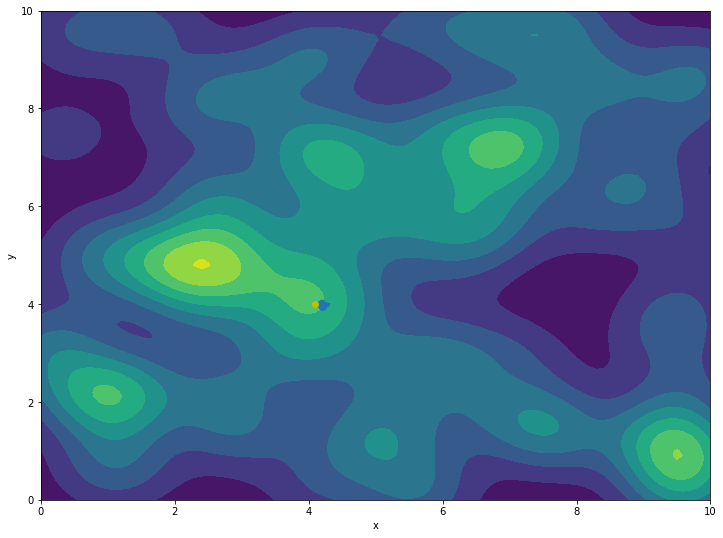

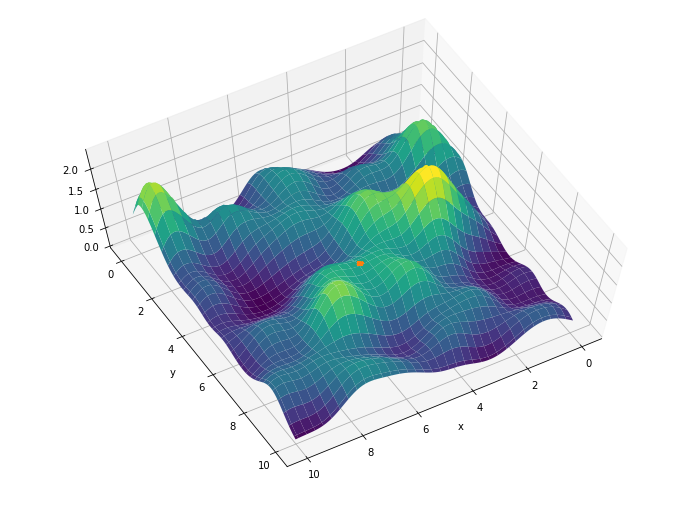

In [12]:
t = int(time.time())
np.random.seed(t)
print(t)
x = y = np.linspace(0, 10, 101)
pos = np.dstack(np.meshgrid(x, y))

f = 0
for k in range(100):
    f += sp.multivariate_normal.pdf(pos, mean=[np.random.random()*10, np.random.random()*10], cov=[[0.4, 0], [0, 0.4]])

# for i in pos[0]:
#     print(i)
#     f += sp.multivariate_normal.pdf(pos, mean=[i[0], i[1]], cov=[[6, 0], [0, 0.2]])

# for k in pos[-1::5][0]:
#     f +=sp.multivariate_normal.pdf(pos, mean=[k[0], k[1]], cov=[[0.2, 0], [0, 0.2]])

gx, gy = np.gradient(f, 0.1, 0.1)

its = 1000

x_hist1 = np.zeros(its)
y_hist1 = np.zeros(its)
x1_loc, y1_loc = (4, 4)
vx1, vy1 = (0.1, 0.1)

x_hist2 = np.zeros(its)
y_hist2 = np.zeros(its)
x2_loc, y2_loc = (4.1, 4)
vx2, vy2 = (0.1, 0.1)
for t in range(its):
    x_hist1[t] = x1_loc
    y_hist1[t] = y1_loc
    vx1 += gx[int(x1_loc/0.1), int(y1_loc/0.1)]
    vy1 += gy[int(x1_loc/0.1), int(y1_loc/0.1)]
    x1_loc += vx1 * 0.01
    if x1_loc > 10 or x1_loc < 0:
        x1_loc -= vx1
        vx1 *= -1
    y1_loc += vy1 * 0.01
    if y1_loc > 10 or y1_loc < 0:
        y1_loc -= vy1
        vy1 *= -1
  
    x_hist2[t] = x2_loc
    y_hist2[t] = y2_loc
    vx2 += gx[int(x2_loc/0.1), int(y2_loc/0.1)]
    vy2 += gy[int(x2_loc/0.1), int(y2_loc/0.1)]
    x2_loc += vx2 * 0.01
    if x2_loc > 10 or x2_loc < 0:
        x2_loc -= vx2
        vx2 *= -1
    y2_loc += vy2 * 0.01
    if y2_loc > 10 or y2_loc < 0:
        y2_loc -= vy2
        vy2 *= -1

plt.contourf(np.linspace(0, 10, 101), np.linspace(0, 10, 101), f)
plt.xlabel("x")
plt.ylabel("y")

# plt.plot(x_hist1, y_hist1)
# plt.plot(x_hist1[0], y_hist1[0], 'ro')

plt.plot(x_hist2, y_hist2)
plt.plot(x_hist2[0], y_hist2[0], 'yo')
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(elev=70, azim=60)
x, y = np.meshgrid(np.linspace(0, 10, 101), np.linspace(0, 10, 101))

ax.plot_surface(x, y, f, cmap=cm.viridis)

ax.plot(x_hist2, y_hist2)
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.show()

##Mooie
# 1488900541